In [53]:
import json
import matplotlib.pyplot as mpl
import os
from pprint import pprint

In [54]:
# for each log in logs load json dump and write to dict with filename as key
folder_path = "logs"

# Initialize an empty list to store the parsed data
parsed_data = {}

# Loop through each file in the directory
for filename in os.listdir(folder_path):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        # Construct the full path of the file
        file_path = os.path.join(folder_path, filename)

        # Open and parse the JSON file
        with open(file_path, "r") as file:
            data = json.load(file)

        # Store the parsed data in a dictionary using the filename as the key
        parsed_data[filename] = data

# Now, `parsed_data` is a dictionary where each key is the filename and each value is the corresponding JSON data
pprint(parsed_data, indent=1)

{'HuggingFaceTB_SmolLM-135M-Instruct_quantization_10dB_2024-11-22_10-17-03_min_0.0_max1.0.json': {'average_bit_width': 3.4170616113744074,
                                                                                                  'error_threshold': 10,
                                                                                                  'layerwise_quantization_info': {'lm_head': {'bit_width': 3,
                                                                                                                                              'error': 12.136600494384766},
                                                                                                                                  'model.layers.0.mlp.down_proj': {'bit_width': 3,
                                                                                                                                                                   'error': 11.194026947021484},
                                      

Text(0.5, 1.0, 'Bitwidth vs. SQNR for \nmeta-llama_Llama-3.2-3B-Instruct_quantization_15dB_2024-11-21_21-35-50.json')

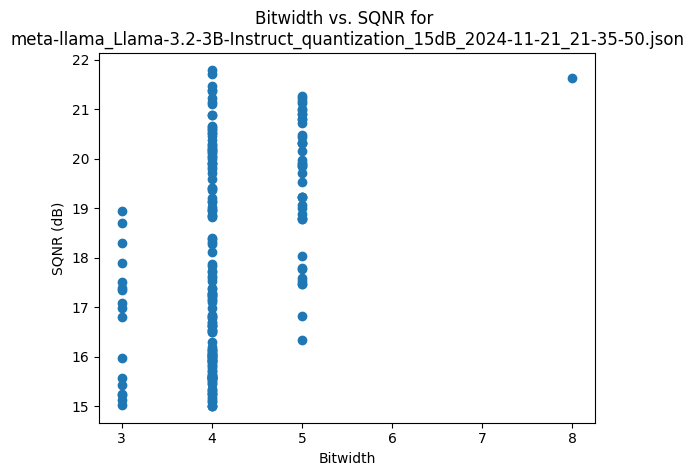

In [55]:
# plot the bitwidth and error for each layer as scatter

# Initialize an empty list to store the bitwidth and error values
bitwidths = []
errors = []

# Loop through each file in the directory
for i, (filename, log_data) in enumerate(parsed_data.items()):
    # Extract the bitwidth and error values from the parsed data
    layers = log_data["layerwise_quantization_info"]
    for layer, layer_data in layers.items():
        bitwidths.append(layer_data["bit_width"])
        errors.append(layer_data["error"])

    if i == 0:
        break

# Plot the bitwidth and error values as a scatter plot
mpl.scatter(bitwidths, errors)
mpl.xlabel("Bitwidth")
mpl.ylabel("SQNR (dB)")
mpl.title(f"Bitwidth vs. SQNR for \n{filename}")

In [56]:
# Visualize logs for SmolLM-135M
folder_path = "logs"
parsed_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".json") and "SmolLM-135M" in filename:
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            data = json.load(file)
        parsed_data[filename] = data

print(len(parsed_data))
pprint(parsed_data, indent=1)

13
{'HuggingFaceTB_SmolLM-135M-Instruct_quantization_10dB_2024-11-22_10-17-03_min_0.0_max1.0.json': {'average_bit_width': 3.4170616113744074,
                                                                                                  'error_threshold': 10,
                                                                                                  'layerwise_quantization_info': {'lm_head': {'bit_width': 3,
                                                                                                                                              'error': 12.136600494384766},
                                                                                                                                  'model.layers.0.mlp.down_proj': {'bit_width': 3,
                                                                                                                                                                   'error': 11.194026947021484},
                                   

Text(0.5, 1.0, 'Max Threshold vs. Average Bitwidth for SmolLM-135M')

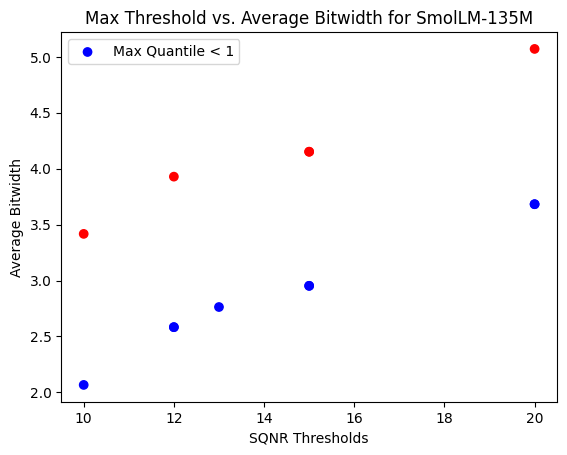

In [57]:
error_thresholds = []
average_bitwidths = []
colors = []

for filename, log_data in parsed_data.items():
    # if log_data["max_quantile"] >= 1:
    # continue

    if log_data["max_quantile"] < 1:
        colors.append("blue")
    else:
        colors.append("red")

    error_threshold = log_data["error_threshold"]
    average_bitwidth = log_data["average_bit_width"]
    error_thresholds.append(error_threshold)
    average_bitwidths.append(average_bitwidth)

    # print(f"{filename}: {error_threshold} {average_bitwidth}")

mpl.scatter(error_thresholds, average_bitwidths, c=colors)
mpl.xlabel("SQNR Thresholds")
mpl.ylabel("Average Bitwidth")
# legend blue means max quantile < 1, red means max quantile >= 1
# add colors
mpl.legend(["Max Quantile < 1", "Max Quantile >= 1"])
mpl.title(f"Max Threshold vs. Average Bitwidth for SmolLM-135M")

Text(0.5, 1.0, 'Average Bitwidth for each Layer Type for SmolLM-135M')

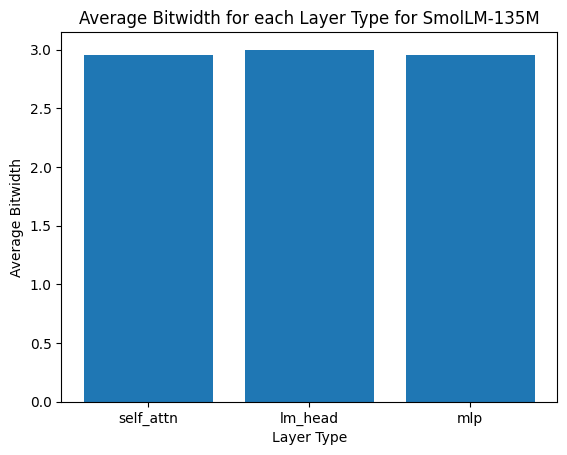

In [58]:
self_attn_bitwidths = []
lm_head_bitwidths = []
mlp_bitwidths = []
for i, (filename, log_data) in enumerate(parsed_data.items()):
    layers = log_data["layerwise_quantization_info"]
    for layer, layer_data in layers.items():
        if "self_attn" in layer:
            self_attn_bitwidths.append(layer_data["bit_width"])
        elif "lm_head" in layer:
            lm_head_bitwidths.append(layer_data["bit_width"])
        elif "mlp" in layer:
            mlp_bitwidths.append(layer_data["bit_width"])
    if i == 0:
        break

# bar diagram for average bitwidths for each layer type
mpl.bar(
    ["self_attn", "lm_head", "mlp"],
    [
        sum(self_attn_bitwidths) / len(self_attn_bitwidths),
        sum(lm_head_bitwidths) / len(lm_head_bitwidths),
        sum(mlp_bitwidths) / len(mlp_bitwidths),
    ],
)
mpl.xlabel("Layer Type")
mpl.ylabel("Average Bitwidth")
mpl.title(f"Average Bitwidth for each Layer Type for SmolLM-135M")

5
{'meta-llama_Llama-3.2-3B-Instruct_quantization_15dB_2024-11-21_21-35-50.json': {'average_bit_width': 4.147208121827411,
                                                                                 'error_threshold': 15,
                                                                                 'layerwise_quantization_info': {'lm_head': {'bit_width': 4,
                                                                                                                             'error': 19.026058197021484},
                                                                                                                 'model.layers.0.mlp.down_proj': {'bit_width': 5,
                                                                                                                                                  'error': 17.795602798461914},
                                                                                                                 'model.layers.0.mlp.gate_p

Text(0.5, 1.0, 'Average Bitwidth for each Layer Type for Llama3.2-3B')

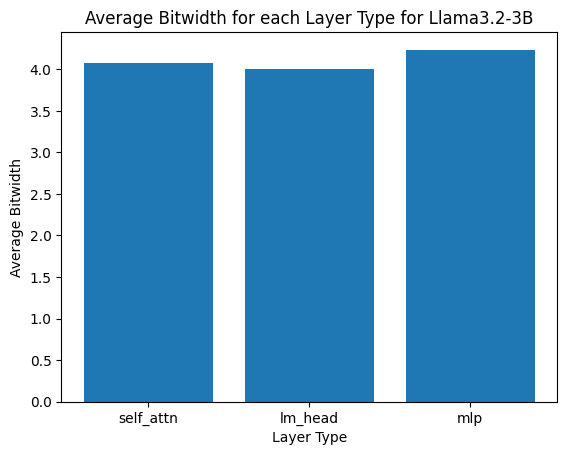

In [59]:
# Visualize logs for SmolLM-135M
folder_path = "logs"
parsed_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".json") and "Llama-3.2-3B" in filename:
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            data = json.load(file)
        parsed_data[filename] = data

print(len(parsed_data))
pprint(parsed_data, indent=1)

self_attn_bitwidths = []
lm_head_bitwidths = []
mlp_bitwidths = []
for i, (filename, log_data) in enumerate(parsed_data.items()):
    if "3B" not in filename:
        continue
    layers = log_data["layerwise_quantization_info"]
    for layer, layer_data in layers.items():
        if "self_attn" in layer:
            self_attn_bitwidths.append(layer_data["bit_width"])
        elif "lm_head" in layer:
            lm_head_bitwidths.append(layer_data["bit_width"])
        elif "mlp" in layer:
            mlp_bitwidths.append(layer_data["bit_width"])
    if i == 0:
        break

# bar diagram for average bitwidths for each layer type
mpl.bar(
    ["self_attn", "lm_head", "mlp"],
    [
        sum(self_attn_bitwidths) / len(self_attn_bitwidths),
        sum(lm_head_bitwidths) / len(lm_head_bitwidths),
        sum(mlp_bitwidths) / len(mlp_bitwidths),
    ],
)
mpl.xlabel("Layer Type")
mpl.ylabel("Average Bitwidth")
mpl.title(f"Average Bitwidth for each Layer Type for Llama3.2-3B")